# Исследование объявлений о продаже квартир

Необходимо определить рыночную стоимость объектов недвижимости. В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача - установить параметры чтобы потом построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [39]:
import pandas as pd
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных**

Из документации к данным нам известно: каждая строка датасета - объект недвижимости из объявления о продаже квартир, каждый столбец - характеристики объекта.

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В данных замечены следующие проблемы:
* Пропуски
* Категориальные значения
* Неверный формат времени
* Неправильные названия столбцов
* Выбросы и аномальные значения

## Предобработка данных

### Стиль заголовков

In [40]:
# выведем названия заголовков
display(data.columns)

# заменим название столбца
data.rename(columns = {'cityCenters_nearest':'center_nearest'}, inplace=True)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка пропусков

In [41]:
# посчитаем пропуски в столбцах
display (data.isna().sum())
display (data.shape)
data.corr()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
center_nearest           5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

(23699, 22)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


В данных довольно много пропусков, как их можно заменить:
* `balcony` - параметр, который указал пользователь, соответственно, если стоит пропуск - скорее всего балконов нет, можно заменить на нулевое значение.
* Значения в столбце `living_area` коррелируются со значениями в столбцах `total_area` и `rooms`, поэтому, сгруппировав данные по этим столбцам, мы можем заменить пропуски на медианные значения по группам.
* `kitchen_area` хорошо коррелируется со столбцом `total_area`, поэтому, сгруппировав данные, заменим пропуски на медианные значени по группам.
* `floors_total` коррелируется со столбцом `floor`, заменим пропуски на медианные значения, сгруппировав данные.
* Пропуски в столбцах гео-признаков заменять нет смысла, так как расстоятие от квартиры до объектов и количество объектов рядом не зависят ни от какой другой величины и их нельзя заменить средним значением
* `ceiling_height` потолки это довольно стандартизированная величина, поэтому можно безболезненно заменить их медианой
* Пропуски в населенных пунктах можно удалить. Мы не можем быть уверены, что эти квартиры принадлежат Санкт-Перербургу.

In [42]:
# меняем пропуски в столбце balcony на нулевое значение
data['balcony'] = data['balcony'].fillna(0)

In [43]:
# меняем пропуски на медианные значения по сгруппированным данным
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area', 'rooms'])['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['floors_total'] = data['floors_total'].fillna(data.groupby('floor')['floors_total'].transform('median'))

In [44]:
# заполняем пропуски на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [45]:
# удаляем пропуски в населенных пунктах
data.dropna(subset = ['locality_name'], inplace = True)

In [46]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area               211
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality_name               0
airports_nearest         5534
center_nearest           5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

### Замена типа данных

In [47]:
# проверим типы данных в таблице
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23439 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23445 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,54.0,9,NaN,...,15.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* `total_area`, `last_price`, `living_area`, `kitchen_area`, `airports_nearest`, `center_nearest`, `parks_nearest`, `ponds_nearest`,  - нужно округлить и заменить на целочисленные значения.
* `floors_total`,  `balcony`, `parks_around3000`, `ponds_around3000	`, `days_exposition` - заменить на целочисленные значения.
* `first_day_exposition` - необходимо перевести в формат Datatime 
* привести значения в столбце `locality_name` к единому стилю
* округлить значения в столбце `last_price` до тысячи

In [48]:
# округляем значения
data = data.round({
    'total_area':0,
    'last_price':0,
    'living_area':0,
    'kitchen_area':0,
    'airports_nearest':0,
    'center_nearest':0,
    'parks_nearest':0,
    'ponds_nearest':0,
    'days_exposition':0 })

In [49]:
# меняем тип данных на целочисленный
data = data.astype({
    'living_area':'Int64',
    'kitchen_area':'Int64',
    'floors_total':'Int64',
    'balcony':'Int64',
    'airports_nearest':'Int64',
    'center_nearest':'Int64',
    'parks_around3000':'Int64',
    'parks_nearest':'Int64',
    'ponds_around3000':'Int64', 
    'ponds_nearest':'Int64',
    'days_exposition':'Int64' })

In [50]:
# меняем формат времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Приведем значения в столбце `locality_name` к единому стилю.

In [89]:
# заменим букву ё на букву е
# приведем все к нижнему регистру
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.lower()

In [52]:
# переведем цену в тыс. рублей
data['last_price'] = round(data['last_price'] / 1000, 1)

### Обработка дубликатов

In [53]:
data.duplicated().sum()

0

Дубликатов в данных нет.

### Чистка таблицы 

In [54]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Для данного исследования нам не пригодятся такие характеристики, как:
* Изображения
* Является ли квартира апартаментами
* Является ли квартира студией
* План квартиры
* Близость к аэропорту
* Наличие парков
* Наличие пруда

In [55]:
data = data.drop(['total_images', 'is_apartment', 'studio', 'open_plan', 'airports_nearest', 'parks_around3000', 
          'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1)
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,center_nearest,days_exposition
0,13000.0,108.0,2019-03-07,3,2.70,16,51,8,25,0,санкт-петербург,16028,<NA>
1,3350.0,40.0,2018-12-04,1,2.65,11,19,1,11,2,поселок шушары,18603,81
2,5196.0,56.0,2015-08-20,2,2.65,5,34,4,8,0,санкт-петербург,13933,558
3,64900.0,159.0,2015-07-24,3,2.65,14,54,9,15,0,санкт-петербург,6800,424
4,10000.0,100.0,2018-06-19,2,3.03,14,32,13,41,0,санкт-петербург,8098,121


**Вывод**

Данные предобработаны:
1. Заголовки приведены к единому стилю
2. Обработано большинство пропусков
3. Заменены типы данных на численные
4. Дубликатов нет

## Расчёты и добавление результатов в таблицу

Необходимо посчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [56]:
# добавим цену за квадратный метр
data['per_meter'] = (data['last_price'] / data['total_area']).round().astype('int')


In [57]:
# добавим день недели, месяц и год публикации объявления
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data = data.drop('first_day_exposition', axis=1)

In [58]:
# добавим этаж квартиры
def floor_type (data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    else: 
        return 'другой'
data['floor'] = data.apply(floor_type, axis=1)

In [59]:
# добавим соотноение жилой и общей площади
data['living_to_total'] = round((data['living_area'] / data['total_area']) * 100)
# добавим соотношение кухни к общей площади
data['kitchen_to_total'] = round((data['kitchen_area'] / data['total_area']) * 100)


## Исследовательский анализ данных

### Изучение параметров

* Изучим следующие параметры: площадь, цена, число комнат, высота потолков
* Построим гистограммы для каждого параметра
* Уберем редкие и выбивающиеся значения

<function matplotlib.pyplot.show(close=None, block=None)>

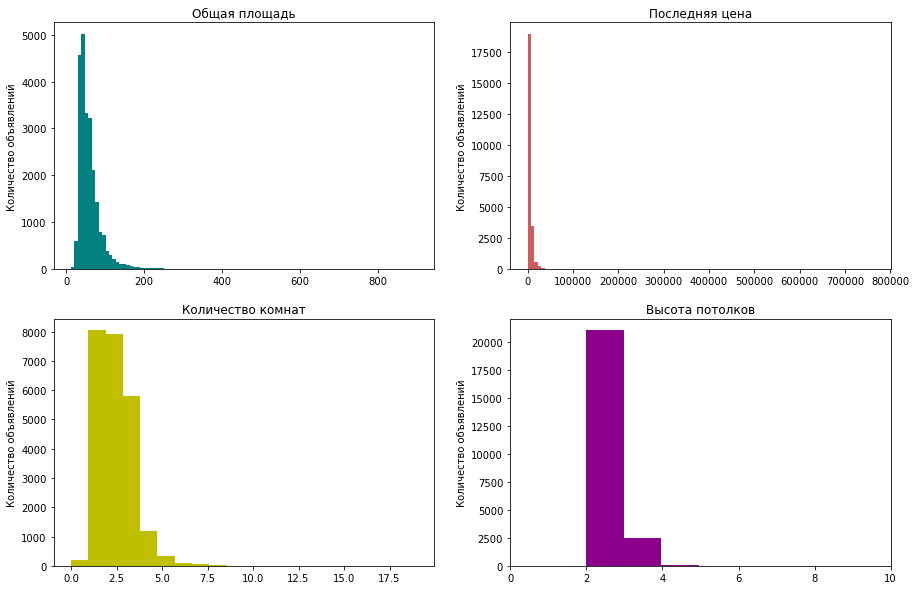

In [60]:
# распределения характеристик в объявлениях
import matplotlib.pyplot as plt

fig = plt.figure( figsize=(15, 10))
axes = fig.subplots(2, 2)

columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

# изучим распределение общей площади в объявлениях
axes[0, 0].hist(data['total_area'], bins=100, color='teal')
axes[0, 0].set_title('Общая площадь')
axes[0, 0].set_ylabel('Количество объявлений')

# изучим распределение цены в объявлениях
axes[0, 1].hist(data['last_price'], bins=100, color='indianred')
axes[0, 1].set_title('Последняя цена')
axes[0, 1].set_ylabel('Количество объявлений')
 
# изучим распределение комнат в объявлениях
axes[1, 0].hist(data['rooms'], bins=20, color='y')
axes[1, 0].set_title('Количество комнат')
axes[1, 0].set_ylabel('Количество объявлений')
axes[1, 1].set_xlim(0, 10)

# изучим распределение высоты потолков в объявлениях
axes[1, 1].hist(data['ceiling_height'], bins=100, color='darkmagenta')
axes[1, 1].set_title('Высота потолков')
axes[1, 1].set_ylabel('Количество объявлений')
axes[1, 1].set_xlim(0, 10)

plt.show

В данных параметрах присутствуют аномальные значения, проверим их количество.

In [61]:
print ('Аномалии в параметре общей площади', data.query('total_area > 300')['locality_name'].count())
print ('Аномалии в параметре цены', data.query('last_price > 40000 or last_price < 500')['locality_name'].count())
print ('Аномалии в параметре комнат', data.query('rooms > 10 or rooms == 0')['locality_name'].count())
print ('Аномалии в параметре высоты потолков', data.query('ceiling_height > 5 or ceiling_height < 2')['rooms'].count())

Аномалии в параметре общей площади 61
Аномалии в параметре цены 196
Аномалии в параметре комнат 205
Аномалии в параметре высоты потолков 39


In [62]:
(61 + 196 + 205 + 30) / data.shape[0] * 100

2.080338266384778

Количество аномалий в данных не превышает 2%, можем удалить данные аномалии, так как они могут помешать проводить исследование далее

In [63]:
# отсекем слишком большую площадь
data = data.query('total_area < 150')

# отсекем цену более 40000 и менее 500
data = data.query('last_price < 40000 and last_price > 500')

# отсекем квартиры с количеством комнат более 10
data = data.query('rooms < 10')
# квартиры с 0 количеством комнат заменим на 1
data.loc[(data.rooms < 1), 'rooms'] = 1

# отсекаем высоту потолков больше 10 метров
data = data.query('ceiling_height < 5 and ceiling_height > 2')

<function matplotlib.pyplot.show(close=None, block=None)>

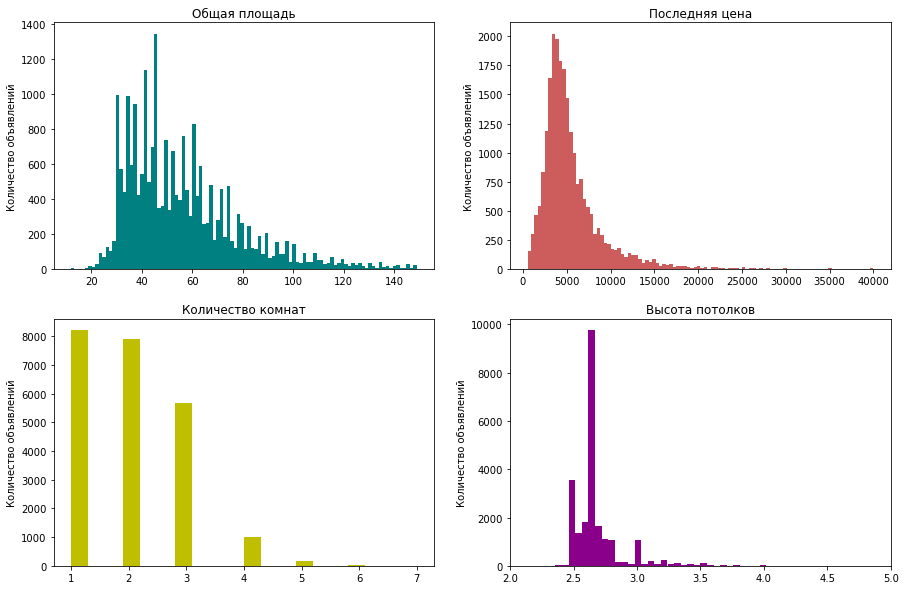

In [64]:
# проверим результат
fig = plt.figure( figsize=(15, 10))
axes = fig.subplots(2, 2)

columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

axes[0, 0].hist(data['total_area'], bins=100, color='teal')
axes[0, 0].set_title('Общая площадь')
axes[0, 0].set_ylabel('Количество объявлений')

axes[0, 1].hist(data['last_price'], bins=100, color='indianred')
axes[0, 1].set_title('Последняя цена')
axes[0, 1].set_ylabel('Количество объявлений')
 
axes[1, 0].hist(data['rooms'], bins=20, color='y')
axes[1, 0].set_title('Количество комнат')
axes[1, 0].set_ylabel('Количество объявлений')
axes[1, 1].set_xlim(0, 10)

axes[1, 1].hist(data['ceiling_height'], bins=50, color='darkmagenta')
axes[1, 1].set_title('Высота потолков')
axes[1, 1].set_ylabel('Количество объявлений')
axes[1, 1].set_xlim(2, 5)

plt.show

**Вывод**

Мы избавились от аномальных значений, распределения параметров нормальные, можно проследить некоторые закономерности в данных:

* Чаще всего в объявлениях встречаются квартиры от 30 до 60 кв/м
* Средняя цена находится в диапазоне от 2 500 000 до 5 000 000
* Квартиры чаще всего однокомнатные или двухкомнатные
* Чаще всего высота потолков в квартирах 2.70 метра

### Время продажи квартиры

Text(0, 0.5, 'Количество объявлений')

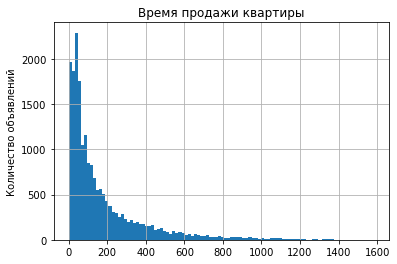

In [65]:
# изучим время продажи квартиры
data['days_exposition'].hist(bins=100)
plt.title('Время продажи квартиры')
plt.ylabel('Количество объявлений')

0.0

count    15470.000000
mean       109.093471
std         92.019691
min          1.000000
25%         33.000000
50%         83.000000
75%        163.000000
max        364.000000
Name: days_exposition, dtype: float64

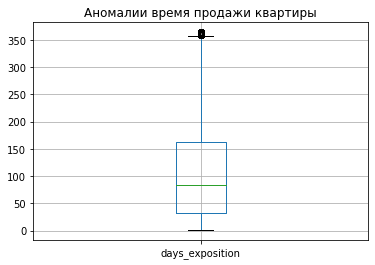

In [73]:
# проверим долю продаж дольше года и сделаем описание данных
display (data[data['days_exposition'] > 365]['days_exposition'].count() / data.shape[0] * 100)
display (data['days_exposition'].describe())

data.boxplot(column='days_exposition')
plt.title('Аномалии время продажи квартиры')
plt.show()

Cтандартное отклонение слишком велико, почти в два раза больше среднего, а значения больше 400 уже можно считать выбросами 

Text(0, 0.5, 'Количество объявлений')

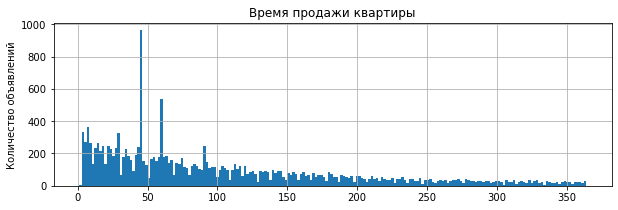

In [68]:
# уберем аномально долгие продажи больше года
data = data[data['days_exposition'] < 365]
data['days_exposition'].hist(bins=200, figsize=(10, 3))
plt.title('Время продажи квартиры')
plt.ylabel('Количество объявлений')

<AxesSubplot:>

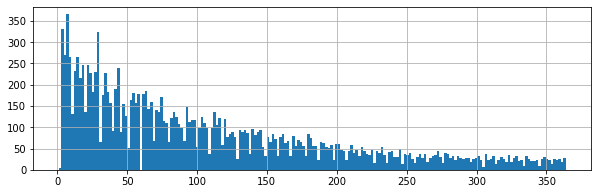

In [69]:
# уберем слишком часто встречающиеся значения
data = data[data['days_exposition'] != 45]
data = data[data['days_exposition'] != 60]
data = data[data['days_exposition'] != 90]
data['days_exposition'].hist(bins=200, figsize=(10, 3))

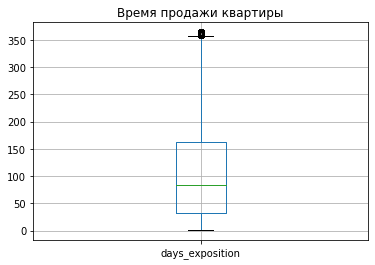

In [88]:
import matplotlib.pyplot as plt
data.boxplot(column='days_exposition')
plt.title('Время продажи квартиры')
plt.show()

**Вывод**

* До 50 дней - продажа прошла быстро
* До 150 дней - среднее время продажи
* До 350 дней - долгая продажа

### Факторы, влияющие на цену квартиры

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также зависимость от даты размещения: дня недели, месяца и года.

Проверим, какие факторы больше всего влияют на стоимость квартиры.
Для этого построим графики, которые показывают зависимость цены от следующих параметров:
* Площадь
* Количество комнат
* Удаленность от центра
* Этаж
* День размещения
* Месяц размещеня
* Год размещения

In [75]:
data.columns

Index(['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'kitchen_area', 'balcony', 'locality_name',
       'center_nearest', 'days_exposition', 'per_meter', 'weekday', 'month',
       'year', 'living_to_total', 'kitchen_to_total'],
      dtype='object')

C:\Users\User\AppData\Local\Temp/ipykernel_12504/37394770.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_center['kilo_to_center'] = round(data['center_nearest'] / 1000).astype('Int64')


'Зависимость цены от площади: '

,total_area,last_price
total_area,1.000000,0.736536
last_price,0.736536,1.000000


'Зависимость цены от числа комнат'

,rooms,last_price
rooms,1.00000,0.44811
last_price,0.44811,1.00000


'Зависимость цены от удаленности от центра'

,center_nearest,per_meter
center_nearest,1.00000,-0.36872
per_meter,-0.36872,1.00000


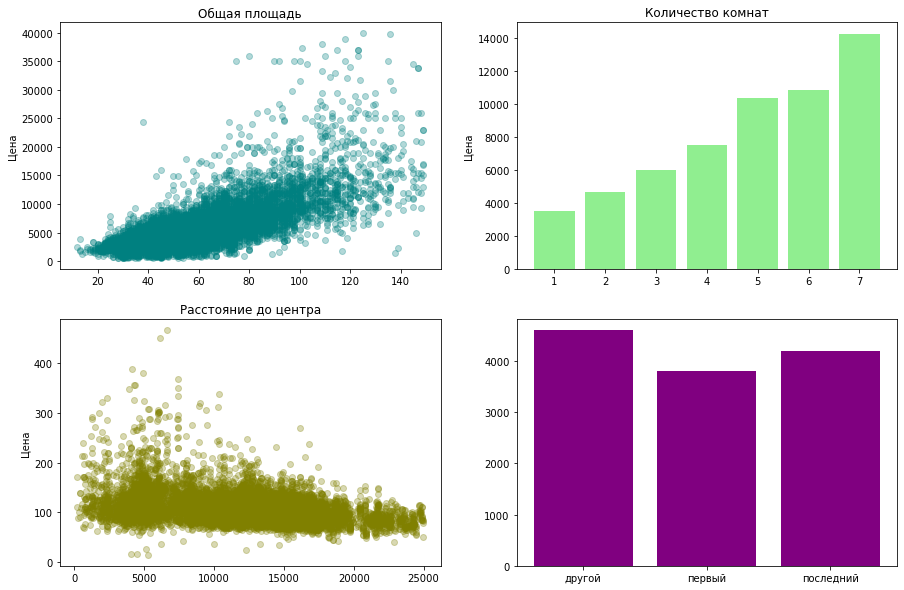

In [76]:
fig = plt.figure( figsize=(15, 10))
axes = fig.subplots(2, 2)

# ПЛОЩАДЬ
axes[0, 0].scatter(x=data['total_area'], y=data['last_price'],  alpha=0.3, color='teal')
axes[0, 0].set_title('Общая площадь')
axes[0, 0].set_ylabel('Цена')

# ЧИСЛО КОМНАТ
rooms_median = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
axes[0, 1].bar(x=rooms_median.index, height=rooms_median['last_price'], color='lightgreen')
axes[0, 1].set_title('Количество комнат')
axes[0, 1].set_ylabel('Цена')

# УДАЛЕННОСТЬ ОТ ЦЕНТРА
# сначала очистим от аномальных значений
clean_center = data[data['center_nearest'] < 25000]

# добавим столбец с расстоянием до центра в километрах
clean_center['kilo_to_center'] = round(data['center_nearest'] / 1000).astype('Int64')
axes[1, 0].scatter(x=clean_center['center_nearest'], y=clean_center['per_meter'], alpha=0.3, color='olive')
axes[1, 0].set_title('Расстояние до центра')
axes[1, 0].set_ylabel('Цена')

# ЭТАЖ
floor_median = data.pivot_table(index='floor', values='last_price', aggfunc='median')
axes[1, 1].bar(x=floor_median.index, height=floor_median['last_price'], color='purple')


display ('Зависимость цены от площади: ', data[['total_area', 'last_price']].corr())
display ('Зависимость цены от числа комнат', data[['rooms','last_price']].corr())
display ('Зависимость цены от удаленности от центра', clean_center[['center_nearest', 'per_meter']].corr())

**Вывод**

* Цена квартиры напрямую коррелирует с общей площадью квартиры, значит параметр площади - важный фактор при оценивании квартиры
* Цена также зависит от количества комнат, однако здесь мы анализируем отношение общей цены и число комнат. Цена за квадратный метр в однокомнатной квартире будет больше, чем в квартире с 2 и больше комнатами.
* Цена зависит от удаленности от центра, однако не связь слабее, чем у цены и площади.
* Квартиры на первом этаже чаще дешевле.

Проверим зависимость цены от даты размещения: дня недели, месяца и года.

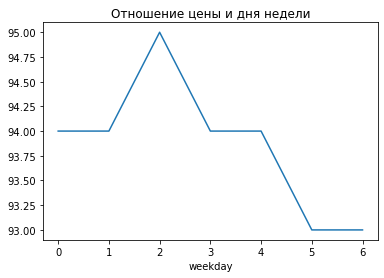

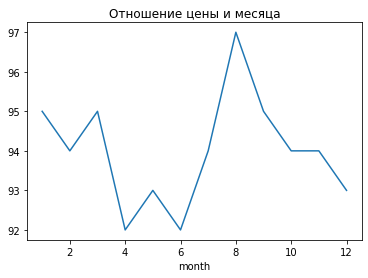

<AxesSubplot:title={'center':'Отношение цены и года'}, xlabel='year'>

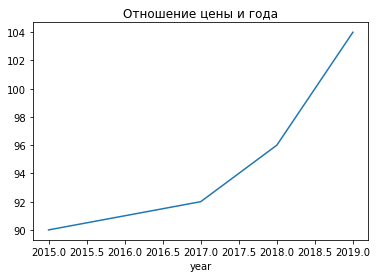

In [77]:
data.groupby('weekday')['per_meter'].median().plot(x='weekday', y='per_meter', title='Отношение цены и дня недели')
plt.show()
data.groupby('month')['per_meter'].median().plot(x='month', y='per_meter', title='Отношение цены и месяца')
plt.show()
data.groupby('year')['per_meter'].median().plot(x='year', y='per_meter', title='Отношение цены и года')


**Вывод**

* Медианная цена за квадратный метр в течении недели меняется: объявления, выставленные в середине недели имеют самую высокую цену, а объявления, выставленные в выходные - самые выгодные.
* В течении года наибольшие изменения мы наблюдаем с апреля по июнь и в декабре, когда цена за квадратный метр достигает минимального значения, в противоположном случае - цена достигает своего максимального значения к сентябрю и снижается к ноябрю.
* С каждым годом цены на квартиры стабильно растут

### Расположения квартир

Проанализируем, как меняется цена в различных населенных пунктах. Выберем 10 пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в них, выделим населенные пункты с самой высокой и низкой стоимостью жилья.

In [78]:
# найдем населенные пункты с наибольшим числом объявлений
data_pivot = data.pivot_table(index='locality_name', values='per_meter',
                              aggfunc=['count', 'mean', 'min', 'max']
                             ).sort_values(('count', 'per_meter'),ascending=False).head(10)
data_pivot.sort_values(('mean', 'per_meter'))

,count,mean,min,max
,per_meter,per_meter,per_meter,per_meter
locality_name,,,,
выборг,149,57.053691,19,86
гатчина,197,67.675127,11,106
всеволожск,255,69.239216,31,642
колпино,242,74.785124,48,125
поселок шушары,327,78.522936,48,148
поселок мурино,455,85.885714,50,140
поселок парголово,226,89.362832,48,138
деревня кудрово,227,92.444934,54,143


Среди населенных пунктов с большим количеством объявлений - Санкт-Петербург, Пушкин, Деревня Кудрово - пункты с самой дорогой ценой за квадратный метр и Выборг, Всеволожск, Гатчина - с самой дешевой.

**Анализ зависимости цены от удаленности от центра**

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выясним, какая область входит в центр и посмотрим, как как цена зависит от удалённости от центра. 

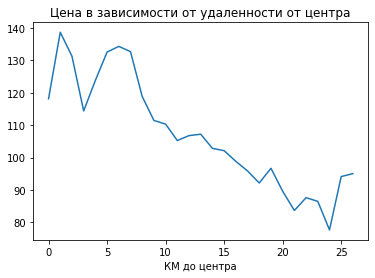

In [86]:
data['kilo_to_center'] = round(data['center_nearest'] / 1000).astype('Int64')

# создадим новую таблицу с объявлениями в Питере
piter_flats = data[data['locality_name'] == 'санкт-петербург']
piter_flats = data[data['kilo_to_center'] < 27]

# построим график зависимости цены от удаленности от центра
piter_flats.groupby('kilo_to_center')['per_meter'].mean().plot()
plt.title('Цена в зависимости от удаленности от центра')
plt.xlabel('КМ до центра')
plt.show()

Определим границу, где график сильно меняется, — это и будет центральная зона. Цена квартир заметно снижается на 3 километре, подъем после 3 можно объяснить тем, что тут появляются особые квартиры с большей площадью, например, или с хорошим видом. Будем считать до 3 км - центр города. 

**Анализ квартир в центре**

Проанализируем сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры и посмотрим, отличаются ли они от общих выводов по всему городу.

In [82]:
# создаем отдельную таблицу квартир в центре Санкт-Петербурга и на окраинах
piter_center = data.loc[(data['locality_name'] == 'санкт-петербург') & (data['kilo_to_center'] <= 3)]
piter_out = data.loc[(data['locality_name'] == 'санкт-петербург') & (data['kilo_to_center'] >= 3)]

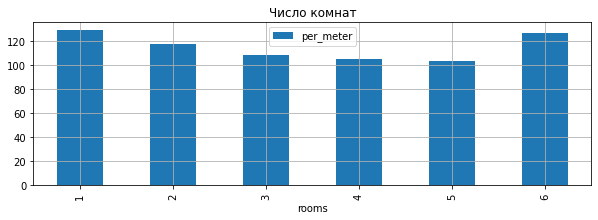

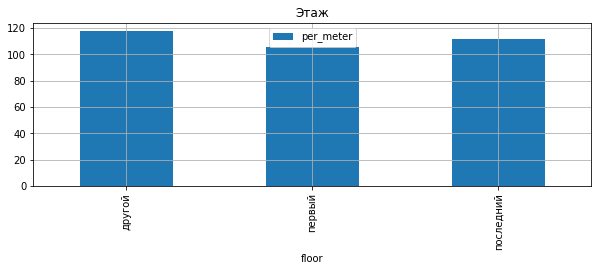

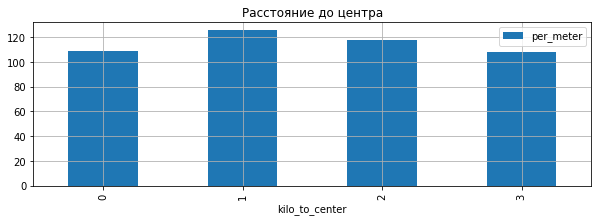

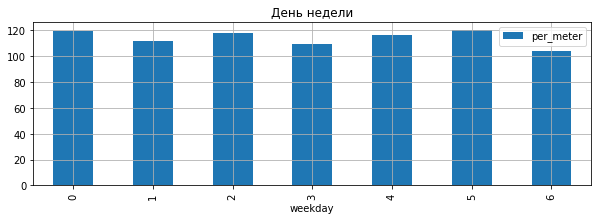

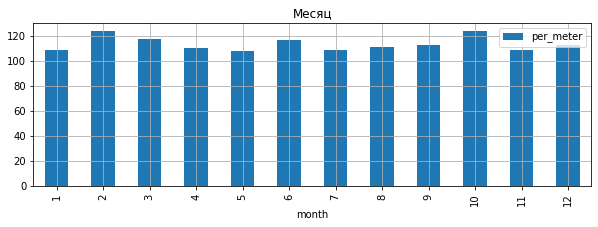

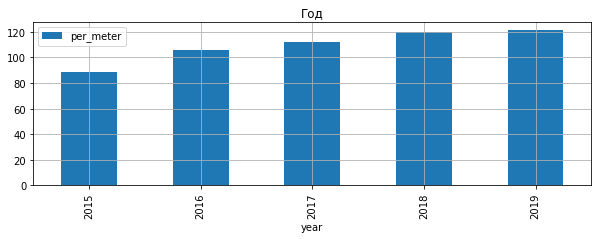

In [83]:
# проанализируем параметры, влияющие на стоимость квартиры в центре
parameters = ['rooms', 'floor', 'kilo_to_center', 'weekday', 'month', 'year']
names = ['Число комнат', 'Этаж', 'Расстояние до центра', 'День недели', 'Месяц', 'Год']
for i in range(len(parameters)):
    piter_center_rooms = piter_center.pivot_table(index=parameters[i], values='per_meter', aggfunc='median')
    piter_center_rooms.plot(y='per_meter', kind='bar', grid=True, figsize = (10, 3), title=names[i])


    


* Квадратный метр дороже всего в однокомнатных квартирах, а так же в квартирах с 6 комнатами
* Квартиры, находящиеся на первом этаже стоят дешевле
* Квартиры на расстоянии до 1 километра и в 3х километрах от центра чуть дешевле всех остальных, расположенных в центральной части Питера
* Квартиры, выставленные в четверг и в воскресенье немного дешевле обходятся, чем в другие дни
* Самые выгодные месяцы для покупки квартиры - апрель, май
* С каждым годом стоимость квадратного метра в центре Питера растет

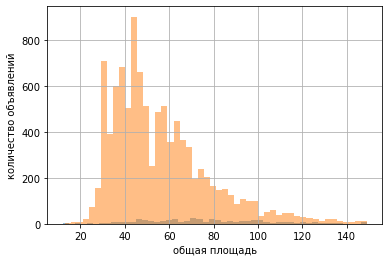

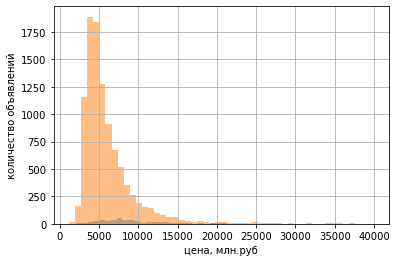

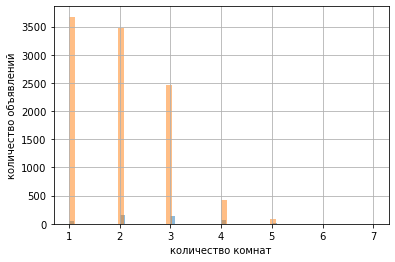

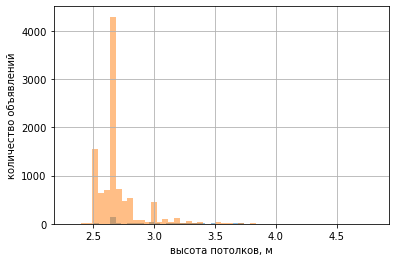

In [84]:
# создаем цикл для построения гистограм
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
name = ['общая площадь', 'цена, млн.руб', 'количество комнат', 'высота потолков, м']
for column in range(len(columns)):
    piter_center[columns[column]].hist(bins=50, alpha=0.5)
    piter_out[columns[column]].hist(bins=50, alpha=0.5)
    plt.ylabel('количество объявлений')
    plt.xlabel(name[column])
    plt.show()

* Площадь квартир в центре Санкт-Петербурга в среднем больше средней площади по всему городу
* Средняя цена объявлений во всем городе от 2 до 5.5 млн, тогда как в центре от 5 до 8 млн
* Большинство объявлений в центре Питера - двухкомнатные и трехкомнатные квартиры, а по всему городу чаще всего выставляют однокомнатные
* Высота потолков в центральной части Питера (3м) в среднем больше высоты потолков в остальном городе (2.5м)

## Общий вывод

1) Чаще всего в объявлениях встречаются квартиры от 30 до 60 кв/м. Средняя цена находится в диапазоне от 2 500 000 до 5 000 000 млн руб. Квартиры чаще всего однокомнатные или двухкомнатные. Высота потолков в квартирах в среднем 2.7 метра. Среднее время продажи квартиры от 50 до 150 дней.

2) Последняя цена квартиры напрямую зависит от количества комнат. Цена квартиры коррелирует с общей площадью квартиры, наиболее выгодная цена за квадратный метр у квартир с 3-5 комнатами. Чем дальше от центра находится квартира, тем меньше ее стоимость.

3) Центральная часть Санкт-Петербурга. Квартиры, находящиеся на первых этажах обычно стоят дешевле. До 1 км до центра и в трех километрах от центра квартиры чуть дешевле всех остальных, расположенных в центральной части Питера. С каждым годом стоимость квадратного метра в центре Питера растет.

4) Центр в сравнении с окраинами. Площадь квартир в центре Санкт-Петербурга в среднем больше средней площади по всему городу. Средняя цена объявлений во всем городе от 2 до 5.5 млн, тогда как в центре от 5 до 8 млн. Большинство объявлений в центре Питера - двухкомнатные и трехкомнатные квартиры, а по всему городу чаще всего выставляют однокомнатные. Высота потолков в центральной части Питера (3м) в среднем больше высоты потолков в остальном городе (2.5м).